In [2]:
import model_helper as mh
import torch
import numpy as np


2.0.1+cu118


In [5]:
ds1 = mh.Dataset()
#ds1.load_dataset(folder='256K_5',splits=[.7,.3,0],split_type="imbalanced_method")
#ds1.load_dataset(folder='v2/32K_5_v2_s0',splits=[.5,.2,.3],split_type="normal")
ds1.load_dataset(folder='thesis_datasets/32K_5',splits=[.5,.2,.3],split_type="normal")
#ds2 = mh.Dataset()
#ds2.load_dataset(folder='64K_5_v2_s2',splits=[0,0,1])

device: cuda:0
loading dataset thesis_datasets/32K_5 | length: 32013 | fraud percentage (%): 7.03


In [3]:
(ds1.data.y[ds1.data.train_mask]).sum().item()/len(ds1.data.y[ds1.data.train_mask]),ds1.data.y[ds1.data.train_mask].sum().item(),len(ds1.data.y[ds1.data.train_mask])

(0.06968664395002339, 3129, 44901)

In [3]:
ds1.data.x


tensor([[ 4.9345, -0.2813, -0.2813,  ...,  0.4920,  0.1673, -0.7298],
        [ 5.0399, -0.2542, -0.2542,  ...,  0.2365, -0.1047, -0.4037],
        [ 5.0447, -0.2395, -0.2395,  ...,  0.1913,  0.0669, -0.5459],
        ...,
        [-0.4009, -0.4008, -0.4008,  ...,  2.4054, -0.4009, -0.4009],
        [-0.4009, -0.4008, -0.4008,  ...,  2.4054, -0.4009, -0.4009],
        [-0.4009, -0.4008, -0.4008,  ...,  2.4054, -0.4009, -0.4009]],
       device='cuda:0')

In [3]:
model = mh.Model(ds1.data,gridsearch_flag=True)
model.w = 1
model.w = .3
model.lr = 0.05
model.load_model("SAGE",K=3,F=8)
model.train_model(epochs=100)


device: cuda:0
model training starting...
torch.int64


RuntimeError: mat1 and mat2 must have the same dtype

In [25]:
model.gridsearch_results

{'test_f1': 0.7432555319793878,
 'test_auc': 0.8152081166744202,
 'test_precision': 0.8975109809663251,
 'test_recall': 0.6342472840144853,
 'test_epoch': 4940}

true positives = 2461
true negatives = 72779
false positives = 308
false negatives = 1405
correct_pos_pred [False False False ... False False False]
sanity check: num true positives, num total positives, sanity check, recall
2461 3866 0.6366 0.6366
76953 76953 12752
76953 76953
<class 'numpy.ndarray'>


d:\Development\Master-Thesis-JS\models\model_helper.py:325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accounts_df['trained_color'][data.train_mask.cpu().numpy()] = 2
d:\Development\Master-Thesis-JS\models\model_helper.py:326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accounts_df['trained_color'][data.val_mask.cpu().numpy()] = 2
d:\Development\Master-Thesis-JS\models\model_helper.py:327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

pred cycle [False False False False False False False False  True False False False
 False False  True  True False False  True False False False False False
  True  True False False False  True False  True False  True  True False
 False False  True False False  True  True  True False  True False False
  True  True  True False False  True  True False False False False False
  True  True  True False False  True  True  True  True  True  True False
  True  True  True  True False  True  True False  True  True  True  True
  True False False  True False  True False  True False  True  True False
 False False  True  True  True  True  True False  True False  True  True
  True  True  True False  True  True False  True  True False  True  True
 False  True  True  True  True  True False False  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True False False False  True  True  True False  True False False  True
  True False  True  True  True  True  Tr

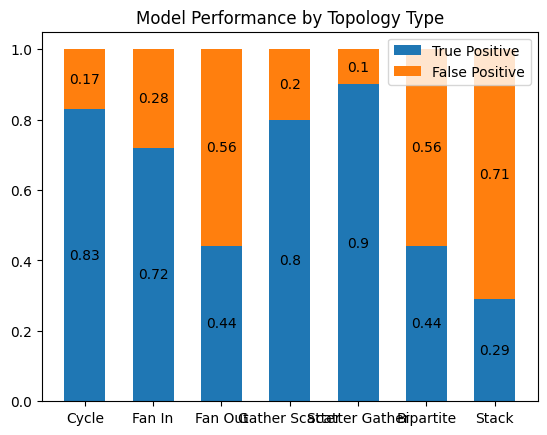

In [26]:
#ds1.data.test_mask = ds1.data.val_mask
model.check_topology_performance(folder=ds1.folder, data=ds1.data)

In [4]:
#gin_feature_indices = [ds1.feature_labels.index(item) for item in ['node_deg_out', 'node_deg_total']]
gin_feature_indices = [ds1.feature_labels.index(item) for item in ['node_deg_out_unique', 'node_deg_in_unique']]
#gin_feature_indices = [-1]
print(gin_feature_indices)
#gin_feature_indices = [-1]
#gin_feature_indices = np.linspace(0,ds1.data.x.shape[1]-1,ds1.data.x.shape[1]).astype(int).tolist()
additional_params = {'K1':2, 'K2':8, 'F1':4, 'F2':16, 'gin_feature_indices':gin_feature_indices}
model = mh.Model(ds1.data,gridsearch_flag=False)
model.w = 0.4
model.lr = 0.002
model.load_model("GINSAGE",additional_params=additional_params)
model.train_model(epochs=5000)
model.gridsearch_results


[19, 11]
device: cuda:0
{'K1': 2, 'K2': 8, 'F1': 6, 'F2': 32, 'gin_feature_indices': [19, 11]}
model training starting...


d:\anaconda\envs\anaconda\envs\GDL2\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\anaconda\envs\GDL2\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\anaconda\envs\GDL2\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\envs\anaconda\envs\GDL2\lib\site-p

KeyboardInterrupt: 

In [18]:

gin_feature_indices = np.linspace(0,ds1.data.x.shape[1],ds1.data.x.shape[1]+1).astype(int).tolist()
#gin_feature_indices = [ds1.feature_labels.index(item) for item in ['node_deg_out_unique', 'node_deg_in_unique']]
gin_feature_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [3]:
gin_feature_indices = [ds1.feature_labels.index(item) for item in ['node_deg_out', 'node_deg_total']]
a = ds1.data.x[:,gin_feature_indices]
ds1.data.x = a
model = mh.Model(ds1.data)
model.w = 1
model.w = .45
model.load_model("GIN",K=2,F=8)
model.train_model(epochs=5000)

device: cuda:0
model training starting...


KeyboardInterrupt: 

In [6]:
ds1.data

Data(x=[32013, 2], edge_index=[2, 759125], y=[32013], edge_weight=[759125], train_mask=[32013], val_mask=[32013], test_mask=[32013])

In [23]:
b = torch.tensor([[1,2,3],[3,4,5],[1,3,5],[0,0,0]]).to(torch.float32)
b = torch.tensor([[0,1,0],[1,1,1],[-1,-1,-1],[0,0,0]]).to(torch.float32)
#x = torch.nn.functional.normalize(b,dim=0,p=1).to(torch.float32)
x=b.clone()
x -= x.min()
x /= x.max()
b, x, x.shape


(tensor([[ 0.,  1.,  0.],
         [ 1.,  1.,  1.],
         [-1., -1., -1.],
         [ 0.,  0.,  0.]]),
 tensor([[0.5000, 1.0000, 0.5000],
         [1.0000, 1.0000, 1.0000],
         [0.0000, 0.0000, 0.0000],
         [0.5000, 0.5000, 0.5000]]),
 torch.Size([4, 3]))

In [44]:
from torch.utils.tensorboard import SummaryWriter
import numpy as np

writer = SummaryWriter()

for n_iter in range(100):
    writer.add_scalar('Loss/train', np.random.random(), n_iter)
    writer.add_scalar('Loss/test', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/train', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/test', np.random.random(), n_iter)

In [30]:
model.test_model(ds1.data)
print()
model.test_model(ds2.data)

test acc: 92.09
test precision: 38.13
test recall: 97.74
test f1-score: 54.85

test acc: 96.6
test precision: 60.97
test recall: 81.24
test f1-score: 69.66


In [12]:
from torch.utils.data import random_split

In [13]:
import numpy as np
splits=[0.35,0.15,0.5]
y = np.round(np.random.rand(100,1)*.55)
train_size = int(splits[0] * len(y))  # 60% of the dataset for training
val_size = int(splits[1] * len(y))    # 20% of the dataset for validation
test_size = len(y) - train_size - val_size  # Remaining 20% for testing
train_dataset, val_dataset, test_dataset = random_split(y, [train_size, val_size, test_size])
#print(train_dataset.indices,val_dataset.indices,test_dataset.indices)

train_dataset.indices[y[train_dataset.indices]==1]

TypeError: only integer scalar arrays can be converted to a scalar index

In [30]:
a = np.array(train_dataset.indices)
b = y[a][:,0]
pos_samples_in_trainset = a[b==1]
c = a[b==0]
neg_samples_in_trainset = np.random.choice(len(c), len(pos_samples_in_trainset), replace=False)
new_trainset_indices = np.concatenate((pos_samples_in_trainset, neg_samples_in_trainset))



In [29]:
np.concatenate((pos_samples_in_trainset, neg_samples_in_trainset))

array([ 7, 93, 16, 27])

In [68]:
train_dataset.dataset == 1

array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [